In [24]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
from enum import Enum
from dotenv import load_dotenv

load_dotenv()

ODS_API_KEY = os.getenv("ODS_API_KEY")
ODS_PAYSAGE_KEY = os.getenv("ODS_PAYSAGE_KEY")

AFFILIATION_MATCHER_API = f"{os.getenv('AFFILIATION_MATCHER_URL')}/match"
AFFILIATION_MATCHER_API_LOCAL = "http://localhost:5004/match"
AFFILIATION_MATCHER_LIST_API = "http://localhost:5004/match_list"
AFFILIATION_MATCHER_LIST_TASK_API = "http://localhost:5004/tasks"

COL_AFFILIATION_IS_MATCH = "affiliation_is_match"
COL_AFFILIATION_STR = "affiliation_string"

MATCH_TYPE = "paysage"

FILE_PATH = "../_data/paysage_match_list_rnsr_acronym.json"

In [25]:
# api/match
def affiliation_get_matches(affiliation: str, year=None, local=False):
  if not isinstance(affiliation, str):
    return None
  
  body = {"type": MATCH_TYPE, "query": affiliation}
  if year:
    body["year"] = year
  
  url = AFFILIATION_MATCHER_API_LOCAL if local else AFFILIATION_MATCHER_API
  

  res=requests.post(url=url, json=body)

  if res.status_code == 202:
    return res.json()
  
  raise Exception("ERROR_{res.status_code}")

# indice find
def elastic_percolate(indice, query):
  url = "http://localhost:9200"
  body = { "query": {"percolate": {"field": "query", "document": { "content": query}}}}
  res = requests.post(f"{url}/{indice}/_search", json=body)
  return res.json()

In [26]:
df = pd.read_json(FILE_PATH)
df.head(2)

,identifiant_interne,identifiant_rnsr,sigle,name,address,city,pays_etranger_acheminement,date_fermeture,affiliation_string,affiliation_match,affiliation_is_match
0,qkn9s,[],LBTI,Laboratoire de biologie tissulaire et d'ingéni...,7 Passage du Vercors,Lyon cedex 7,France,NaN,LBTI - Laboratoire de biologie tissulaire et d...,[201320569F],MATCH.NO_ID_MATCH
1,fix0g,[],ECCOREV,Écosystèmes continentaux et risques environnem...,Avenue Louis Philibert,Aix-en Provence Cedex 4,France,NaN,ECCOREV - Écosystèmes continentaux et risques ...,[200810703D],MATCH.NO_ID_MATCH


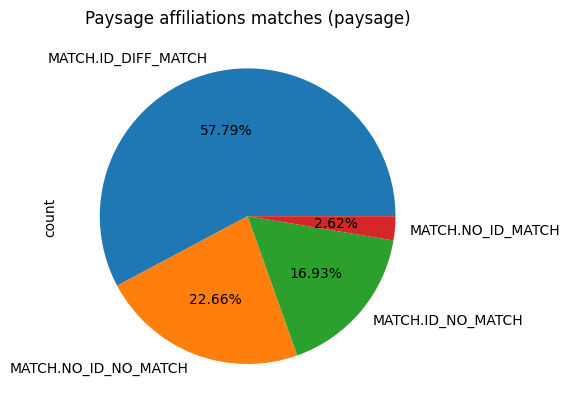

In [27]:
df[COL_AFFILIATION_IS_MATCH].value_counts().plot.pie(title=f"Paysage affiliations matches ({MATCH_TYPE})", autopct="%.02f%%")
plt.show()

DIFF_MATCH

In [28]:
df_diff_match = df[df[COL_AFFILIATION_IS_MATCH] == "MATCH.ID_DIFF_MATCH"]
len(df_diff_match)

1321

In [29]:
test = df_diff_match.iloc[2]
display(test)
print(test[COL_AFFILIATION_STR])
affiliation_get_matches(test[COL_AFFILIATION_STR], local=True)

identifiant_interne                                                       thJOu
identifiant_rnsr                                                   [201722663P]
sigle                                                                      DMAS
name                                        Département matériaux et structures
address                                        29 Avenue de la Division Leclerc
city                                                                  Châtillon
pays_etranger_acheminement                                               France
date_fermeture                                                              NaN
affiliation_string            DMAS - Département matériaux et structures, 29...
affiliation_match                                                  [201722663P]
affiliation_is_match                                        MATCH.ID_DIFF_MATCH
Name: 37, dtype: object

DMAS - Département matériaux et structures, 29 Avenue de la Division Leclerc, Châtillon, France


{'enriched_results': [{'acronym': ['DMAS'],
   'city': ['Châtillon'],
   'country': ['France'],
   'id': 'thJOu',
   'name': ['Département matériaux structures',
    'Materials and Structures Department']}],
 'highlights': {'paysage_acronym;paysage_city': {'thJOu': {'paysage_acronym': [['<em>dmas</em> - département matériaux et structures, 29 avenue de la division leclerc, châtillon, france']],
    'paysage_city': [['dmas - département matériaux et structures, 29 avenue de la division leclerc, <em>châtillon</em>, france']]}},
  'paysage_acronym;paysage_name;paysage_city': {'thJOu': {'paysage_acronym': [['<em>dmas</em> - département matériaux et structures, 29 avenue de la division leclerc, châtillon, france']],
    'paysage_city': [['dmas - département matériaux et structures, 29 avenue de la division leclerc, <em>châtillon</em>, france']],
    'paysage_name': [['dmas - <em>département</em> <em>matériaux</em> <em>structures</em>, 29 avenue division leclerc, châtillon, france']]}},
  'p

NO MATCH

In [30]:
df_no_match = df[df[COL_AFFILIATION_IS_MATCH] == "MATCH.ID_NO_MATCH"]
len(df_no_match)

387

In [31]:
test = df_no_match.iloc[13]
display(test)
print(test[COL_AFFILIATION_STR])
affiliation_get_matches(test[COL_AFFILIATION_STR], local=True)

identifiant_interne                                                       RdQr7
identifiant_rnsr                                                   [200512539M]
sigle                                                                      IPGP
name                                              Institut de physique du globe
address                                                           1 rue Jussieu
city                                                             Paris CEDEX 05
pays_etranger_acheminement                                               France
date_fermeture                                                              NaN
affiliation_string            IPGP - Institut de physique du globe, 1 rue Ju...
affiliation_match                                                            []
affiliation_is_match                                          MATCH.ID_NO_MATCH
Name: 253, dtype: object

IPGP - Institut de physique du globe, 1 rue Jussieu, Paris CEDEX 05, France


{'enriched_results': [{'acronym': ['IPGP'],
   'city': ['Paris CEDEX 05'],
   'country': ['France'],
   'id': 'RdQr7',
   'name': ['Institut physique globe',
    'Paris Institute of Earth Physics',
    'IPG Paris']}],
 'highlights': {'paysage_acronym;paysage_city': {'RdQr7': {'paysage_acronym': [['<em>ipgp</em> - institut de physique du globe, 1 rue jussieu, paris cedex 05, france']],
    'paysage_city': [['ipgp - institut de physique du globe, 1 rue jussieu, <em>paris</em> <em>cedex</em> <em>05</em>, france']]}},
  'paysage_acronym;paysage_name;paysage_city': {'RdQr7': {'paysage_acronym': [['<em>ipgp</em> - institut de physique du globe, 1 rue jussieu, paris cedex 05, france']],
    'paysage_city': [['ipgp - institut de physique du globe, 1 rue jussieu, <em>paris</em> <em>cedex</em> <em>05</em>, france']],
    'paysage_name': [['ipgp - <em>institut</em> <em>physique</em> <em>globe</em>, 1 rue jussieu, paris cedex 05, france']]}},
  'paysage_acronym;paysage_name;paysage_zone_emploi': {

NO ID - MATCH

In [33]:
df_match = df[df[COL_AFFILIATION_IS_MATCH] == "MATCH.NO_ID_MATCH"]
len(df_match)

60

In [35]:
test = df_match.iloc[1]
display(test)
print(test[COL_AFFILIATION_STR])
affiliation_get_matches(test[COL_AFFILIATION_STR], local=True)

identifiant_interne                                                       fix0g
identifiant_rnsr                                                             []
sigle                                                                   ECCOREV
name                          Écosystèmes continentaux et risques environnem...
address                                                  Avenue Louis Philibert
city                                                    Aix-en Provence Cedex 4
pays_etranger_acheminement                                               France
date_fermeture                                                              NaN
affiliation_string            ECCOREV - Écosystèmes continentaux et risques ...
affiliation_match                                                  [200810703D]
affiliation_is_match                                          MATCH.NO_ID_MATCH
Name: 1, dtype: object

ECCOREV - Écosystèmes continentaux et risques environnementaux, Avenue Louis Philibert, Aix-en Provence Cedex 4, France


{'enriched_results': [{'acronym': ['ECCOREV'],
   'city': ['Aix-Provence Cedex 4'],
   'country': ['France'],
   'id': 'fix0g',
   'name': ['Écosystèmes continentaux risques environnementaux']}],
 'highlights': {'paysage_acronym;paysage_city': {'fix0g': {'paysage_acronym': [['<em>eccorev</em> - écosystèmes continentaux et risques environnementaux, avenue louis philibert, aix-en provence']],
    'paysage_city': [['eccorev - écosystèmes continentaux et risques environnementaux, avenue louis philibert, <em>aix</em>-en <em>provence</em>',
      '<em>cedex</em> <em>4</em>, france']]}},
  'paysage_acronym;paysage_name;paysage_city': {'fix0g': {'paysage_acronym': [['<em>eccorev</em> - écosystèmes continentaux et risques environnementaux, avenue louis philibert, aix-en provence']],
    'paysage_city': [['eccorev - écosystèmes continentaux et risques environnementaux, avenue louis philibert, <em>aix</em>-en <em>provence</em>',
      '<em>cedex</em> <em>4</em>, france']],
    'paysage_name': [['

TEST

In [32]:
indice = "matcher-20240422131806_paysage_year"
query = "2022"
elastic_percolate(indice, query)

{'error': {'root_cause': [{'type': 'index_not_found_exception',
    'reason': 'no such index [matcher-20240422131806_paysage_year]',
    'resource.type': 'index_or_alias',
    'resource.id': 'matcher-20240422131806_paysage_year',
    'index_uuid': '_na_',
    'index': 'matcher-20240422131806_paysage_year'}],
  'type': 'index_not_found_exception',
  'reason': 'no such index [matcher-20240422131806_paysage_year]',
  'resource.type': 'index_or_alias',
  'resource.id': 'matcher-20240422131806_paysage_year',
  'index_uuid': '_na_',
  'index': 'matcher-20240422131806_paysage_year'},
 'status': 404}